In [5]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading the dataset

df=pd.read_csv('hotel_bookings.csv')

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#knowing about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#checking missing values

missing=df.isnull().sum()
print("Misisng values:\n",missing[missing>0])

# checking data types

print("\nData Types:\n",df.dtypes)

Misisng values:
 children         4
country        488
agent        16340
company     112593
dtype: int64

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 objec

In [9]:
#handle missing values

#children - 4 missing values -- filling with most commmon value

df['children']=df['children'].fillna(df['children'].mode()[0])

In [10]:
#country--488 missing -- categorical value--fill with unknown value

df['country']=df['country'].fillna('Unknown')

In [11]:
# agent --16340 missing -- fill with 0 for no agent

df['agent']=df['agent'].fillna(0).astype(int)

In [12]:
# company -- 112593 missing 
#creating a column (binary flag column) for missing company values so later maybe we can use 

df['is_company_missing']=df['company'].isnull().astype(int)

print(df[['company','is_company_missing']].head(10))

   company  is_company_missing
0      NaN                   1
1      NaN                   1
2      NaN                   1
3      NaN                   1
4      NaN                   1
5      NaN                   1
6      NaN                   1
7      NaN                   1
8      NaN                   1
9      NaN                   1


In [13]:
#checking for missing  -- company will remain as we haven't changed later we can drop later if not used

print("remaining missing values:",df.isnull().sum().sum())

remaining missing values: 112593


In [14]:
# removing duplicate values

print("Duplicates before:",df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicates after:",df.duplicated().sum())

Duplicates before: 31994
Duplicates after: 0


In [15]:
# fix data types (if needed)

#children is float64 -- changing to int

df['children']=df['children'].astype(int)

In [16]:
# reservation_status_date from object to datetime

df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [17]:
#checking

print(df.dtypes[['children','reservation_status_date']])

children                            int32
reservation_status_date    datetime64[ns]
dtype: object


In [18]:
#handling outliers

#numerical columns

num_cols=df.select_dtypes(include=['int64','float64']).columns
print("Numerical Columns:",num_cols.tolist())

Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [19]:
#finding outliers

for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier_count=df[(df[col]<lower_bound)|(df[col]>upper_bound)].shape[0]
    print(f"{col}:{outlier_count} outliers")

is_canceled:0 outliers
lead_time:2396 outliers
arrival_date_year:0 outliers
arrival_date_week_number:0 outliers
arrival_date_day_of_month:0 outliers
stays_in_weekend_nights:220 outliers
stays_in_week_nights:1531 outliers
adults:22899 outliers
babies:914 outliers
is_repeated_guest:3415 outliers
previous_cancellations:1685 outliers
previous_bookings_not_canceled:3545 outliers
booking_changes:15902 outliers
company:0 outliers
days_in_waiting_list:860 outliers
adr:2490 outliers
required_car_parking_spaces:7313 outliers
total_of_special_requests:2673 outliers


In [20]:
df.shape

(87396, 33)

In [21]:
#remove ouliers

def remove_outliers_iqr(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return df[(df[col]>=lower) & (df[col]<=upper)]

cols_to_remove=['adr','lead_time','stays_in_week_nights','stays_in_weekend_nights','babies','required_car_parking_spaces']

for cols in cols_to_remove:
    df=remove_outliers_iqr(df,col)

#cap outliers

#cap adults at 4(rare to have >4 in one room)
df['adults']=df['adults'].clip(upper=4)

#cap booking_changes at 5
df['booking_changes']=df['booking_changes'].clip(upper=5)

# cap special requests at 5
df['total_of_special_requests']=df['total_of_special_requests'].clip(upper=5)

In [22]:
#final check

print("Final dataset shape:",df.shape)

Final dataset shape: (84723, 33)


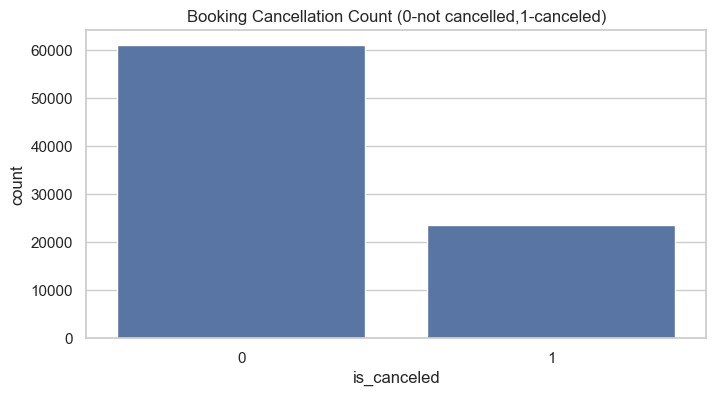

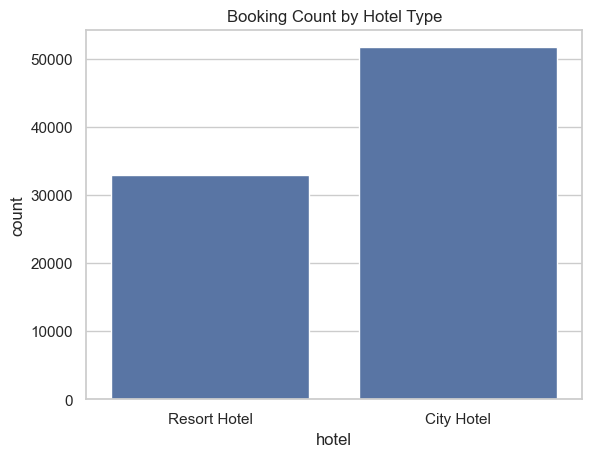

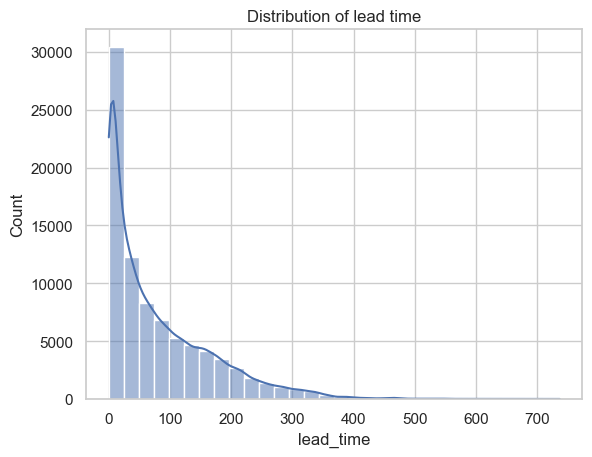

In [23]:
#EDA --Exploratory Data Analysis


#univariate analysis

sns.set(style="whitegrid")
plt.figure(figsize=(8,4))


#cancellation count
sns.countplot(data=df,x='is_canceled')
plt.title('Booking Cancellation Count (0-not cancelled,1-canceled)')
plt.show()

#hotel type distribution
sns.countplot(data=df,x='hotel')
plt.title('Booking Count by Hotel Type')
plt.show()

# distibution of lead time
sns.histplot(data=df,x='lead_time',bins=30,kde=True)
plt.title('Distribution of lead time')
plt.show()


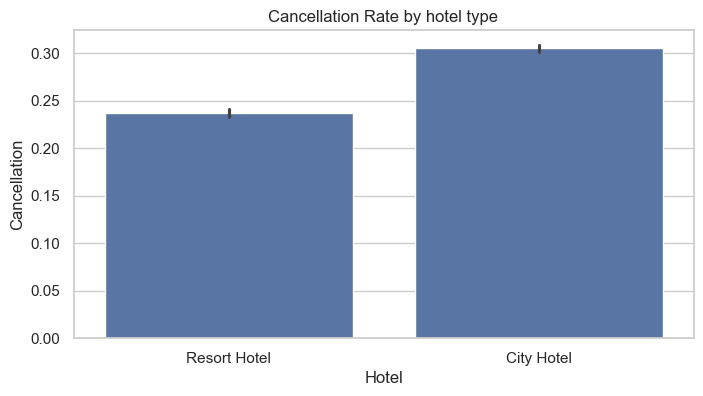

In [24]:
#Bivariate analysis

#cancellation rate by hotel
plt.figure(figsize=(8,4))
sns.barplot(x='hotel',y='is_canceled',data=df)
plt.title('Cancellation Rate by hotel type')
plt.xlabel('Hotel')
plt.ylabel('Cancellation')
plt.show()

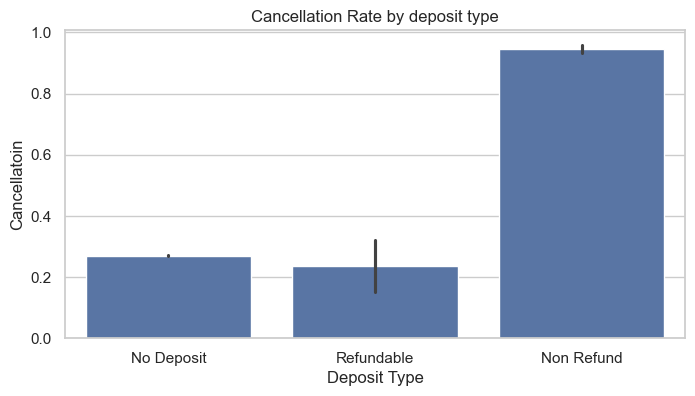

In [25]:
#cancellation by deposit type

plt.figure(figsize=(8,4))
sns.barplot(x='deposit_type',y='is_canceled',data=df)
plt.title('Cancellation Rate by deposit type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellatoin')
plt.show()

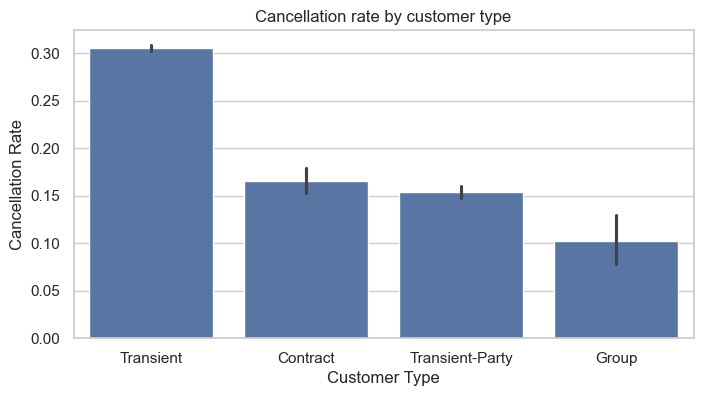

In [26]:
#cancellation by customer type
plt.figure(figsize=(8,4))
sns.barplot(x='customer_type',y='is_canceled',data=df)
plt.title('Cancellation rate by customer type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

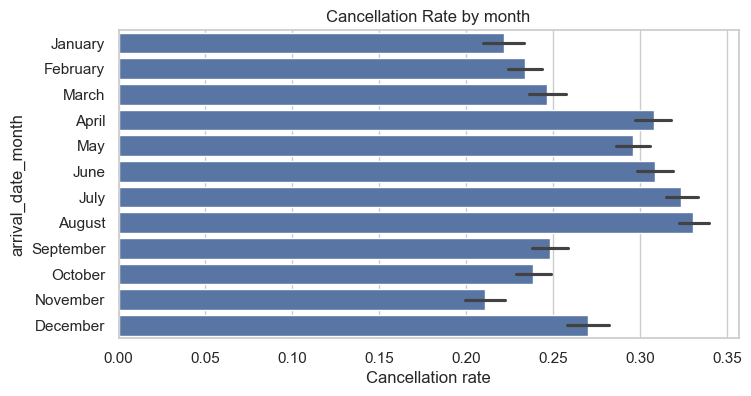

In [28]:
#seasonal patterns

#cancellation rate by month
plt.figure(figsize=(8,4))
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(data=df,y='arrival_date_month',x='is_canceled',order=month_order)
plt.title('Cancellation Rate by month')
plt.xlabel('Cancellation rate')
plt.show()

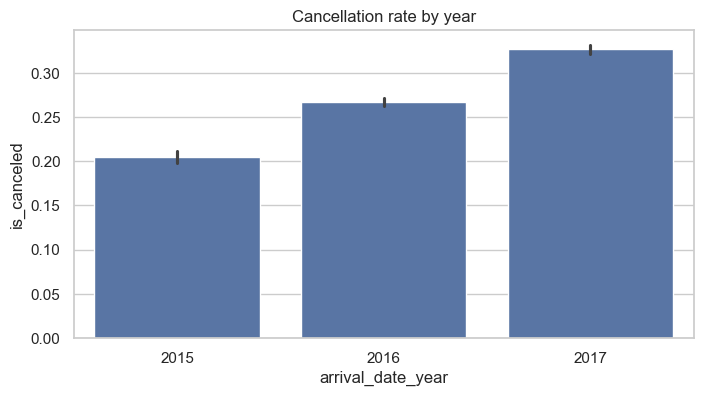

In [29]:
#cancellation by year
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='arrival_date_year',y='is_canceled')
plt.title('Cancellation rate by year')
plt.show()

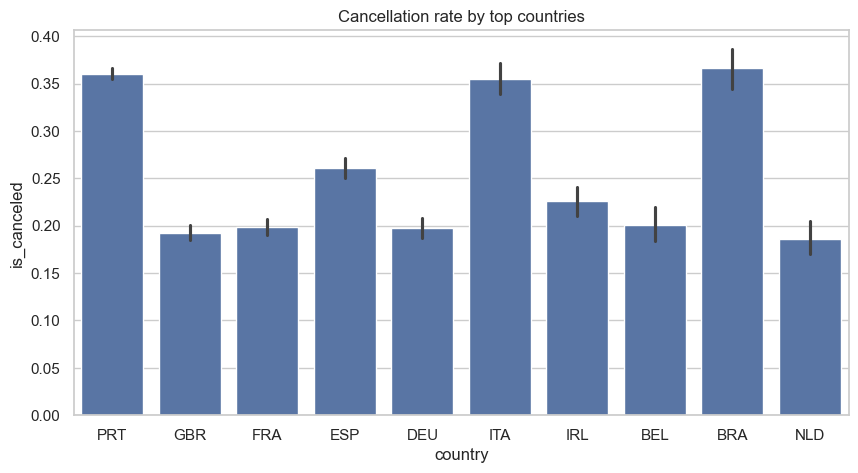

In [49]:
#country wise trends

top_countries=df['country'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(data=df[df['country'].isin(top_countries)],x='country',y='is_canceled',order=top_countries)
plt.title('Cancellation rate by top countries')
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_9248\287220293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='coolwarm')


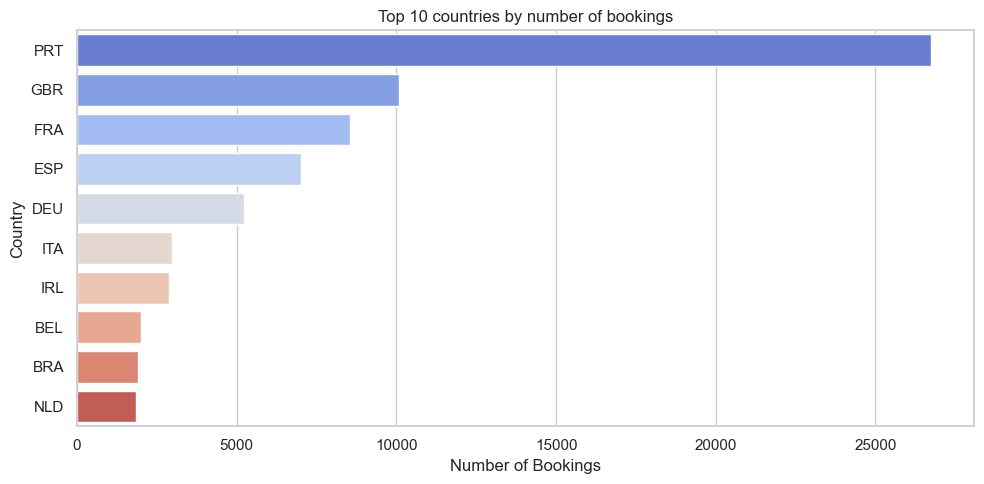

In [30]:
#top 10 countries by booking count

top_countries=df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values,y=top_countries.index,palette='coolwarm')
plt.title('Top 10 countries by number of bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

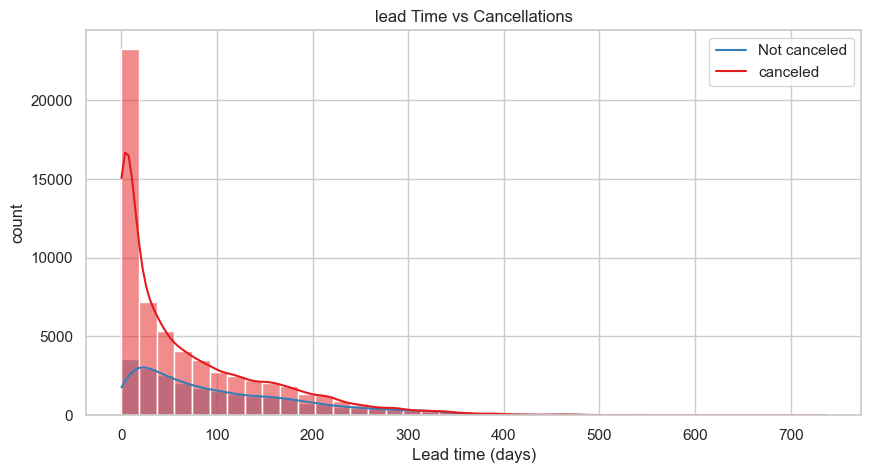

In [31]:
#lead time vs cancelled

plt.figure(figsize=(10,5))
sns.histplot(data=df,x='lead_time',hue='is_canceled',bins=40,kde=True,palette='Set1')
plt.title('lead Time vs Cancellations')
plt.xlabel('Lead time (days)')
plt.ylabel('count')
plt.legend(labels=['Not canceled','canceled'])
plt.show()

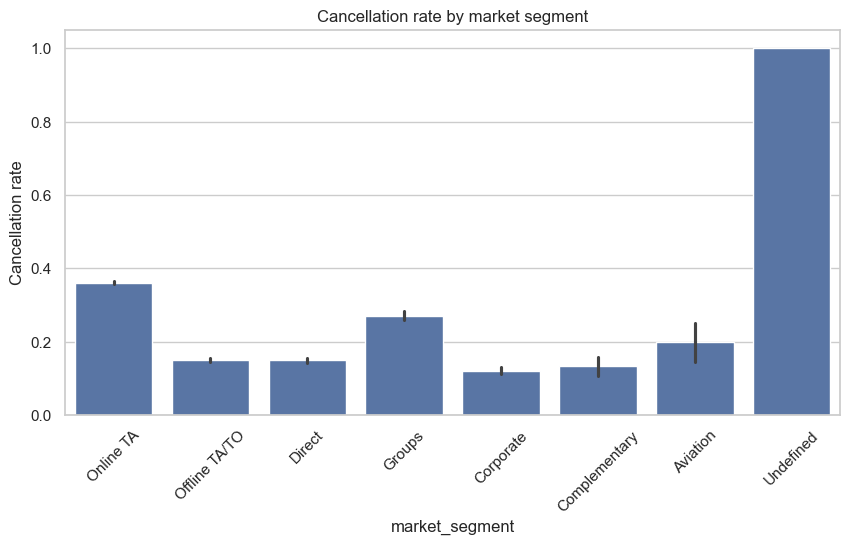

In [32]:
#marget segment vs is_canceled

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='market_segment',y='is_canceled',order=df['market_segment'].value_counts().index)
plt.title('Cancellation rate by market segment')
plt.ylabel('Cancellation rate')
plt.xticks(rotation=45)
plt.show()

In [33]:
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())


Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [34]:
# Function to plot bar charts for categorical columns
def plot_categorical(col):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()










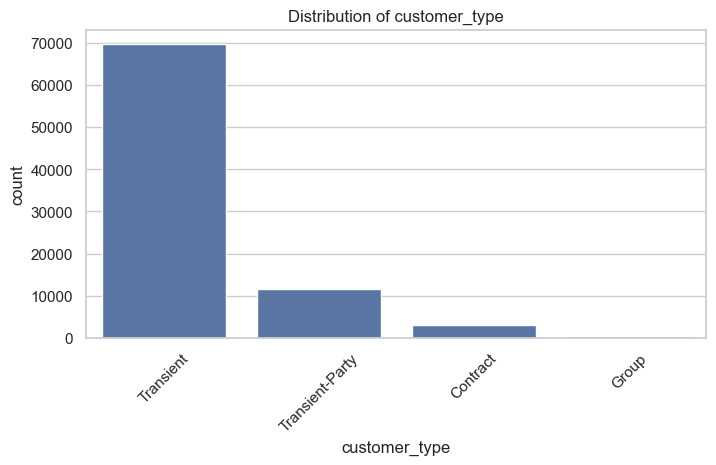

In [35]:
plot_categorical('customer_type')

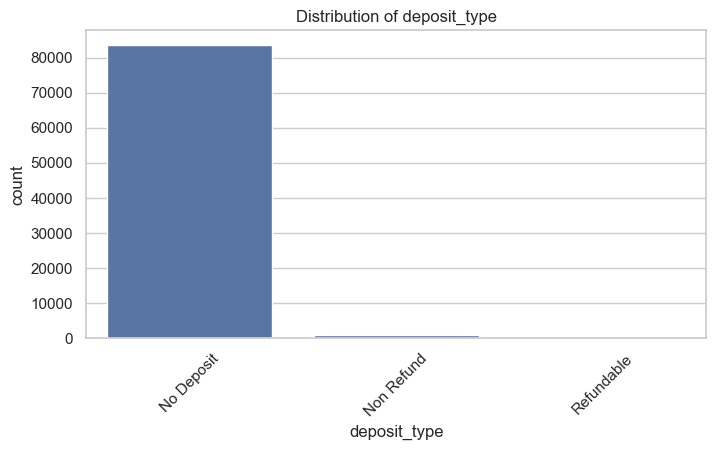

In [36]:
plot_categorical('deposit_type')

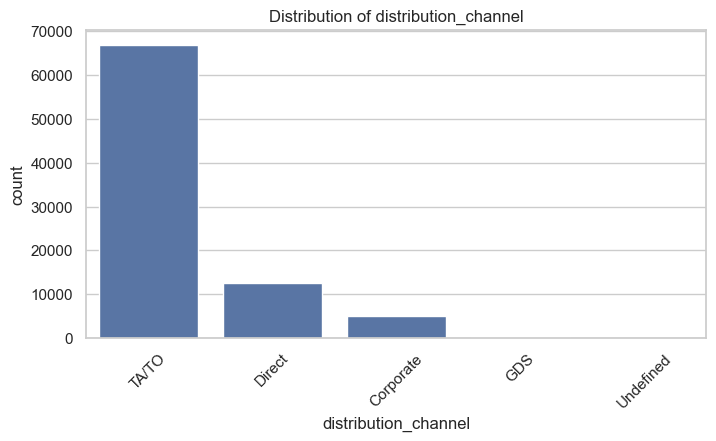

In [37]:
plot_categorical('distribution_channel')

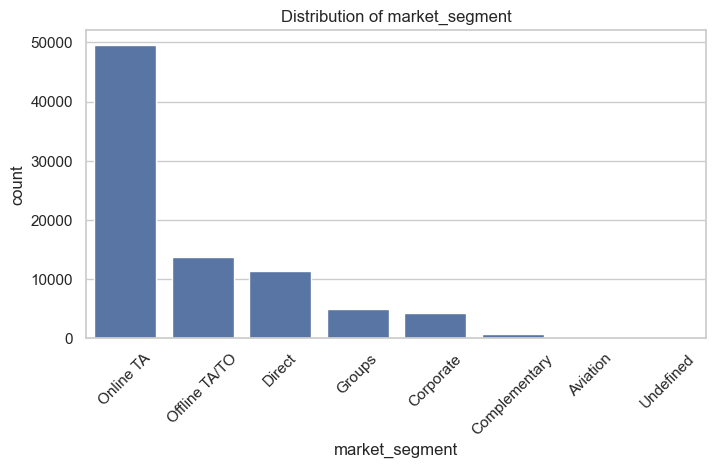

In [38]:
plot_categorical('market_segment')

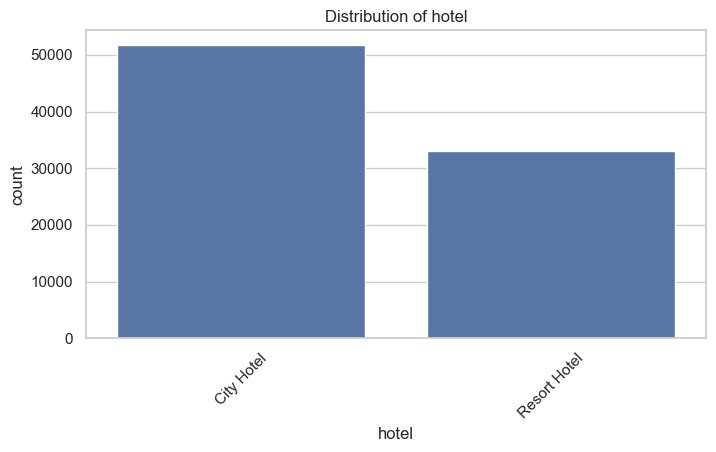

In [39]:
plot_categorical('hotel')

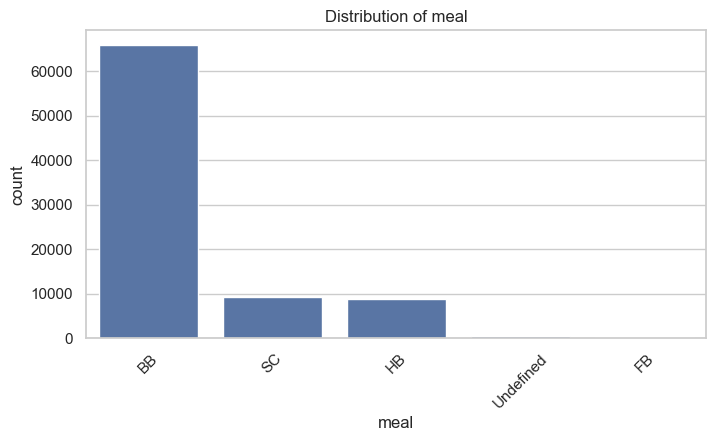

In [40]:
plot_categorical('meal')

In [41]:
#Feature engineering

#total stay duration
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

#total guests
df['total_guests']=df['adults']+df['children']+df['babies']

#is family booking?
df['is_family']=df['total_guests'].apply(lambda x:1 if x>1 else 0)

#is weekend stay
df['is_weekend_stay']=df['stays_in_weekend_nights'].apply(lambda x:1 if x>0 else 0)

#season feature
month_season_map={
    'November':'Winter','December':'Winter','January':'Winter','February':'Winter',
    'March':'Spring','April':'Spring',
    'May':'Summer','June':'Summer','July':'Rainy','August':'Rainy',
    'September':'Fall','October':'Fall',
}
df['season'] = df['arrival_date_month'].map(month_season_map)

#repeated customer
df['is_repeated_customer']=df['is_repeated_guest'].apply(lambda x:1 if x>0 else 0)

#arrival date 
if {'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'}.issubset(df.columns):
    df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: str(x))
    df['arrival_date'] = pd.to_datetime(
        df['arrival_date_year'].astype(str) + '-' +
        df['arrival_date_month'] + '-' +
        df['arrival_date_day_of_month'].astype(str),
        errors='coerce'
    )


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84723 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84723 non-null  object        
 1   is_canceled                     84723 non-null  int64         
 2   lead_time                       84723 non-null  int64         
 3   arrival_date_year               84723 non-null  int64         
 4   arrival_date_month              84723 non-null  object        
 5   arrival_date_week_number        84723 non-null  int64         
 6   arrival_date_day_of_month       84723 non-null  int64         
 7   stays_in_weekend_nights         84723 non-null  int64         
 8   stays_in_week_nights            84723 non-null  int64         
 9   adults                          84723 non-null  int64         
 10  children                        84723 non-null  int32         
 11  babies

In [66]:
df.to_csv('cleaned_hotel_bookings_data.csv',index=False)
print('Cleaned dataset saved successfully!')

Cleaned dataset saved successfully!


In [43]:
#Model Building

df['room_mismatch']=(df['assigned_room_type']!=df['reserved_room_type']).astype(int)

#drop original columns due to high cardinality - not needed for models

df.drop(['assigned_room_type','reserved_room_type'],axis=1,inplace=True)

#get top 10 countries by booking volumes
top_countries=df['country'].value_counts().nlargest(10).index

#group others as 'other'
df['country_grouped']=df['country'].apply(lambda x:x if x in top_countries else 'Other')

#drop original country column
df.drop('country',axis=1,inplace=True)

#drop reservation_status - target leakage
df.drop('reservation_status', axis=1, inplace=True)

# Drop original agent
df.drop('agent', axis=1, inplace=True)

In [44]:
#one hot encoding
df_encoded=pd.get_dummies(df,drop_first=True)

#separate features and target
target=df_encoded['is_canceled']
features=df_encoded.drop('is_canceled',axis=1)

print("features shape:",features.shape)
print("Target distribution:",target.value_counts())

features shape: (84723, 73)
Target distribution: is_canceled
0    61131
1    23592
Name: count, dtype: int64


In [45]:
# Drop datetime columns from feature set before training and missing values column
cols=['reservation_status_date','company','arrival_date']
for col in cols:
    if col in features.columns:
        features = features.drop(col, axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84723 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84723 non-null  object        
 1   is_canceled                     84723 non-null  int64         
 2   lead_time                       84723 non-null  int64         
 3   arrival_date_year               84723 non-null  int64         
 4   arrival_date_month              84723 non-null  object        
 5   arrival_date_week_number        84723 non-null  int64         
 6   arrival_date_day_of_month       84723 non-null  int64         
 7   stays_in_weekend_nights         84723 non-null  int64         
 8   stays_in_week_nights            84723 non-null  int64         
 9   adults                          84723 non-null  int64         
 10  children                        84723 non-null  int32         
 11  babies

In [47]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84723 entries, 0 to 119389
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       84723 non-null  int64  
 1   arrival_date_year               84723 non-null  int64  
 2   arrival_date_week_number        84723 non-null  int64  
 3   arrival_date_day_of_month       84723 non-null  int64  
 4   stays_in_weekend_nights         84723 non-null  int64  
 5   stays_in_week_nights            84723 non-null  int64  
 6   adults                          84723 non-null  int64  
 7   children                        84723 non-null  int32  
 8   babies                          84723 non-null  int64  
 9   is_repeated_guest               84723 non-null  int64  
 10  previous_cancellations          84723 non-null  int64  
 11  previous_bookings_not_canceled  84723 non-null  int64  
 12  booking_changes                 8472

In [48]:

#split data into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42,stratify=target)

print("Training set shape:",X_train.shape)
print("Test set shape:",X_test.shape)

Training set shape: (67778, 70)
Test set shape: (16945, 70)


In [49]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,random_state=42)

#train a model
model.fit(X_train,y_train)
print("Model training complete")

Model training complete


In [50]:
#evaluate the model performance

from sklearn.metrics import classification_report,confusion_matrix

y_pred=model.predict(X_test)

#evaluation
print("Classification Report:\n",classification_report(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     12226
           1       0.76      0.64      0.69      4719

    accuracy                           0.84     16945
   macro avg       0.81      0.78      0.79     16945
weighted avg       0.84      0.84      0.84     16945

confusion matrix:
 [[11248   978]
 [ 1687  3032]]


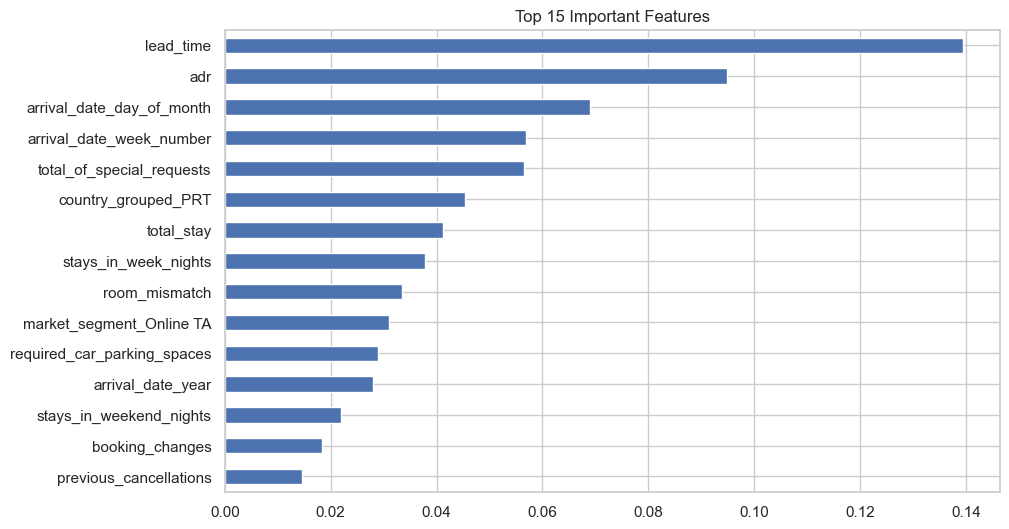

In [51]:
#feature importance

feat_importance=pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(15).sort_values().plot(kind='barh',figsize=(10,6))
plt.title("Top 15 Important Features")
plt.show()

In [52]:
#improving the model

#handling class imbalance with class_weight="balanced"

model_balanced=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)

model_balanced.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [53]:
y_pred_balanced=model_balanced.predict(X_test)

print("Classification report (balanced):\n",classification_report(y_test,y_pred_balanced))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_balanced))


#no major changes noticed --trying other models for comparision

Classification report (balanced):
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     12226
           1       0.76      0.64      0.69      4719

    accuracy                           0.84     16945
   macro avg       0.81      0.78      0.79     16945
weighted avg       0.84      0.84      0.84     16945

confusion matrix:
 [[11275   951]
 [ 1722  2997]]


In [54]:
#logistic regression

from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
log_model.fit(X_train,y_train)

y_pred_log=log_model.predict(X_test)

print("Logistic Regression report:\n",classification_report(y_test,y_pred_log))

Logistic Regression report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80     12226
           1       0.53      0.79      0.63      4719

    accuracy                           0.74     16945
   macro avg       0.71      0.76      0.72     16945
weighted avg       0.79      0.74      0.75     16945



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
#XGBoost Classifier - advance tree based model
from xgboost import XGBClassifier

xgb_model=XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_model.fit(X_train,y_train)

y_pred_xgb=xgb_model.predict(X_test)

print("XGBoost report:\n",classification_report(y_test,y_pred_xgb))

C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:44:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     12226
           1       0.75      0.67      0.71      4719

    accuracy                           0.84     16945
   macro avg       0.81      0.79      0.80     16945
weighted avg       0.84      0.84      0.84     16945



In [56]:
from sklearn.model_selection import GridSearchCV

#fine tuning XGBoost

xgb_base=XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)

# hyperparameter grid
param_grid={
    'n_estimators':[100,200],
    'max_depth':[3,5,7],
    'learjobsning_rate':[0.01,0.1],
    'subsample':[0.8,1],
    'colsample_bytree':[0.8,1]
}

#grid search
grid_xgb=GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

#fit grid search
grid_xgb.fit(X_train,y_train)

#best model
best_xgb=grid_xgb.best_estimator_
print("Best XGBoost params:",grid_xgb.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "learjobsning_rate", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost params: {'colsample_bytree': 1, 'learjobsning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}


In [57]:
y_pred_best_xgb=best_xgb.predict(X_test)
print("Fine-tuned XGBoost report:\n",classification_report(y_test,y_pred_best_xgb))

Fine-tuned XGBoost report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     12226
           1       0.74      0.67      0.71      4719

    accuracy                           0.84     16945
   macro avg       0.81      0.79      0.80     16945
weighted avg       0.84      0.84      0.84     16945



In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
dt_model.fit(X_train,y_train)

y_pred_dt=dt_model.predict(X_test)

print("Decision Tree report:\n",classification_report(y_test,y_pred_dt))

Decision Tree report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.76     12226
           1       0.48      0.89      0.62      4719

    accuracy                           0.70     16945
   macro avg       0.71      0.76      0.69     16945
weighted avg       0.81      0.70      0.72     16945



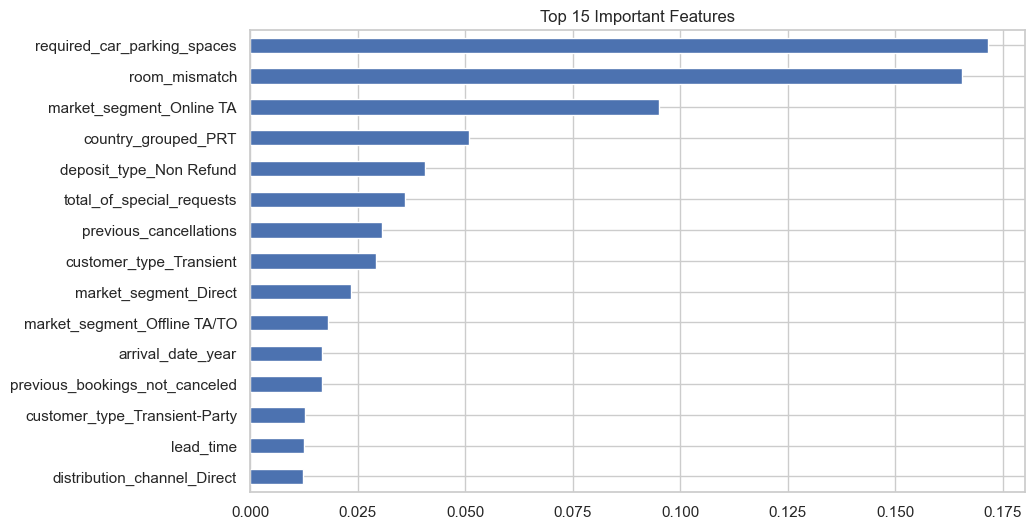

In [59]:
xgb_feat_importance=pd.Series(best_xgb.feature_importances_,index=features.columns)
xgb_feat_importance.nlargest(15).sort_values().plot(kind='barh',figsize=(10,6))
plt.title("Top 15 Important Features")
plt.show()

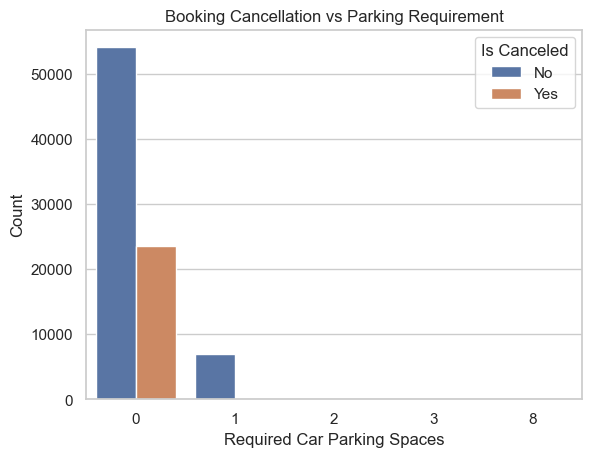

In [60]:
#evaluating the important features of XGBoost

#parking requirement vs Booking Cancellation

sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=df)
plt.title('Booking Cancellation vs Parking Requirement')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()


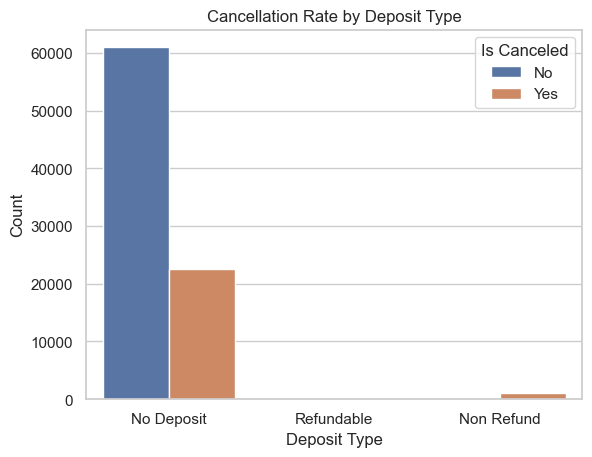

In [61]:
#Cancellation rate by deposit type

sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()

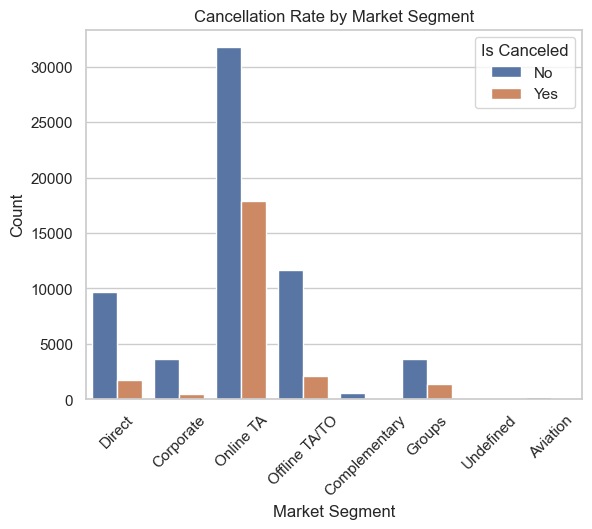

In [62]:
#Cancellation rate by Market segment

sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


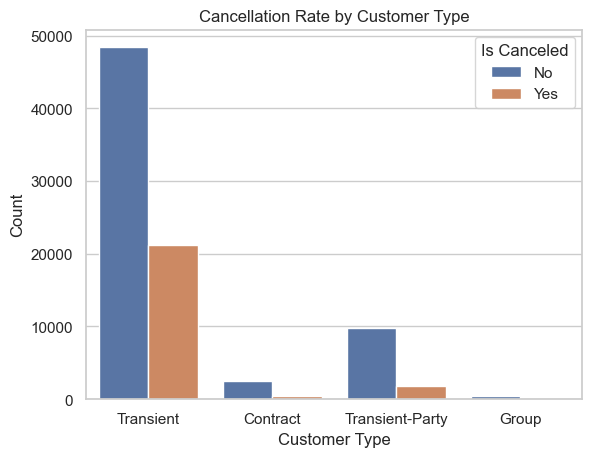

In [64]:
#Cancellation Rate by customer type

sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()


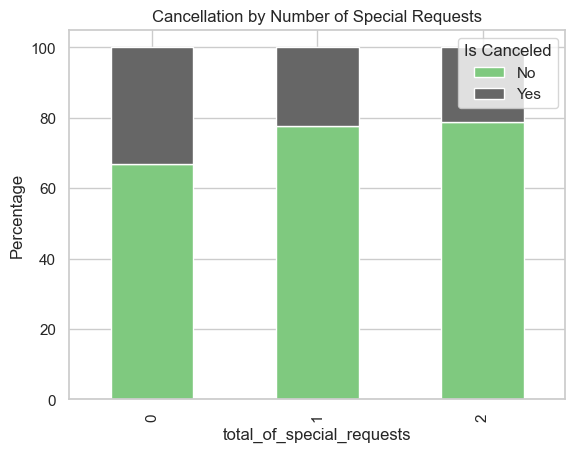

In [65]:
# Cancellation by Number of Special Requests

request_cancel = df.groupby('total_of_special_requests')['is_canceled'].value_counts(normalize=True).unstack() * 100
request_cancel.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Cancellation by Number of Special Requests')
plt.ylabel('Percentage')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()


In [66]:
#saving the model

import joblib

#saving the best model
joblib.dump(best_xgb,'xgboost_cancellation_model.pkl')

['xgboost_cancellation_model.pkl']